In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('../data/hearing_test.csv')

In [56]:
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [57]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

C:\Users\pc\anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='test_result', ylabel='count'>

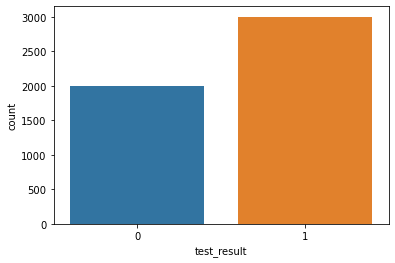

In [58]:
sns.countplot(df['test_result'])

<AxesSubplot:xlabel='test_result', ylabel='age'>

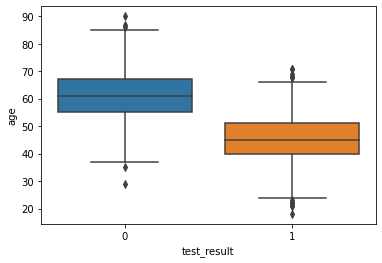

In [59]:
sns.boxplot(data=df, x='test_result', y='age')

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

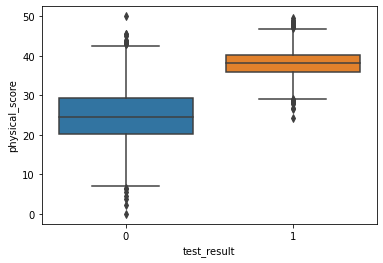

In [60]:
sns.boxplot(data=df, x='test_result', y='physical_score')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

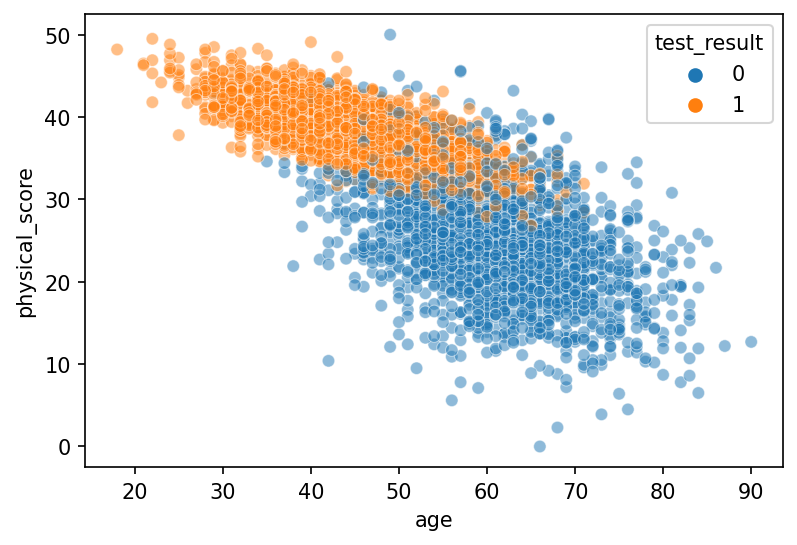

In [61]:
plt.figure(dpi=150)
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result', alpha=.5)

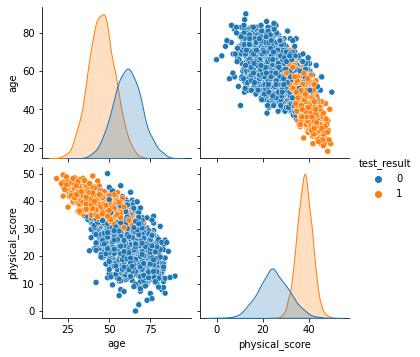

In [62]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

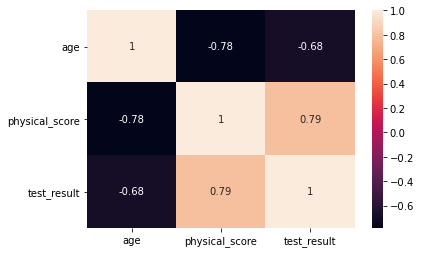

In [63]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

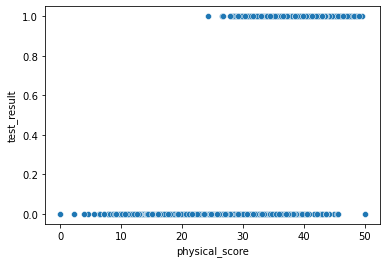

In [64]:
sns.scatterplot(x='physical_score', y='test_result', data=df)

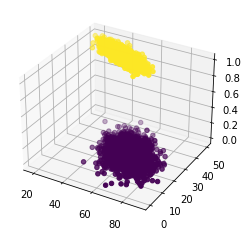

In [65]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

In [66]:
X = df.drop('test_result',axis =1)

In [67]:
y = df['test_result']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [71]:
scaler = StandardScaler()

In [72]:
scaled_x_train = scaler.fit_transform(X_train)

In [73]:
scaled_x_test = scaler.transform(X_test)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model_log = LogisticRegression()

In [76]:
model_log.fit(scaled_x_train,y_train)

LogisticRegression()

In [77]:
model_log.coef_

array([[-0.94953524,  3.45991194]])

In [78]:
y_pred = model_log.predict(scaled_x_test)

In [79]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [81]:
y_pred = model_log.predict(scaled_x_test)

In [82]:
accuracy_score(y_test,y_pred)

0.93

In [83]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [84]:
from sklearn.metrics import plot_confusion_matrix

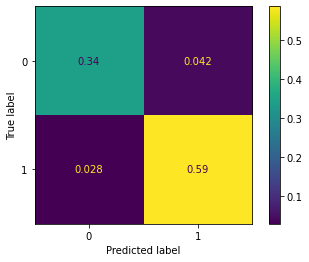

In [85]:
plot_confusion_matrix(model_log,scaled_x_test,y_test, normalize='all')

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [87]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

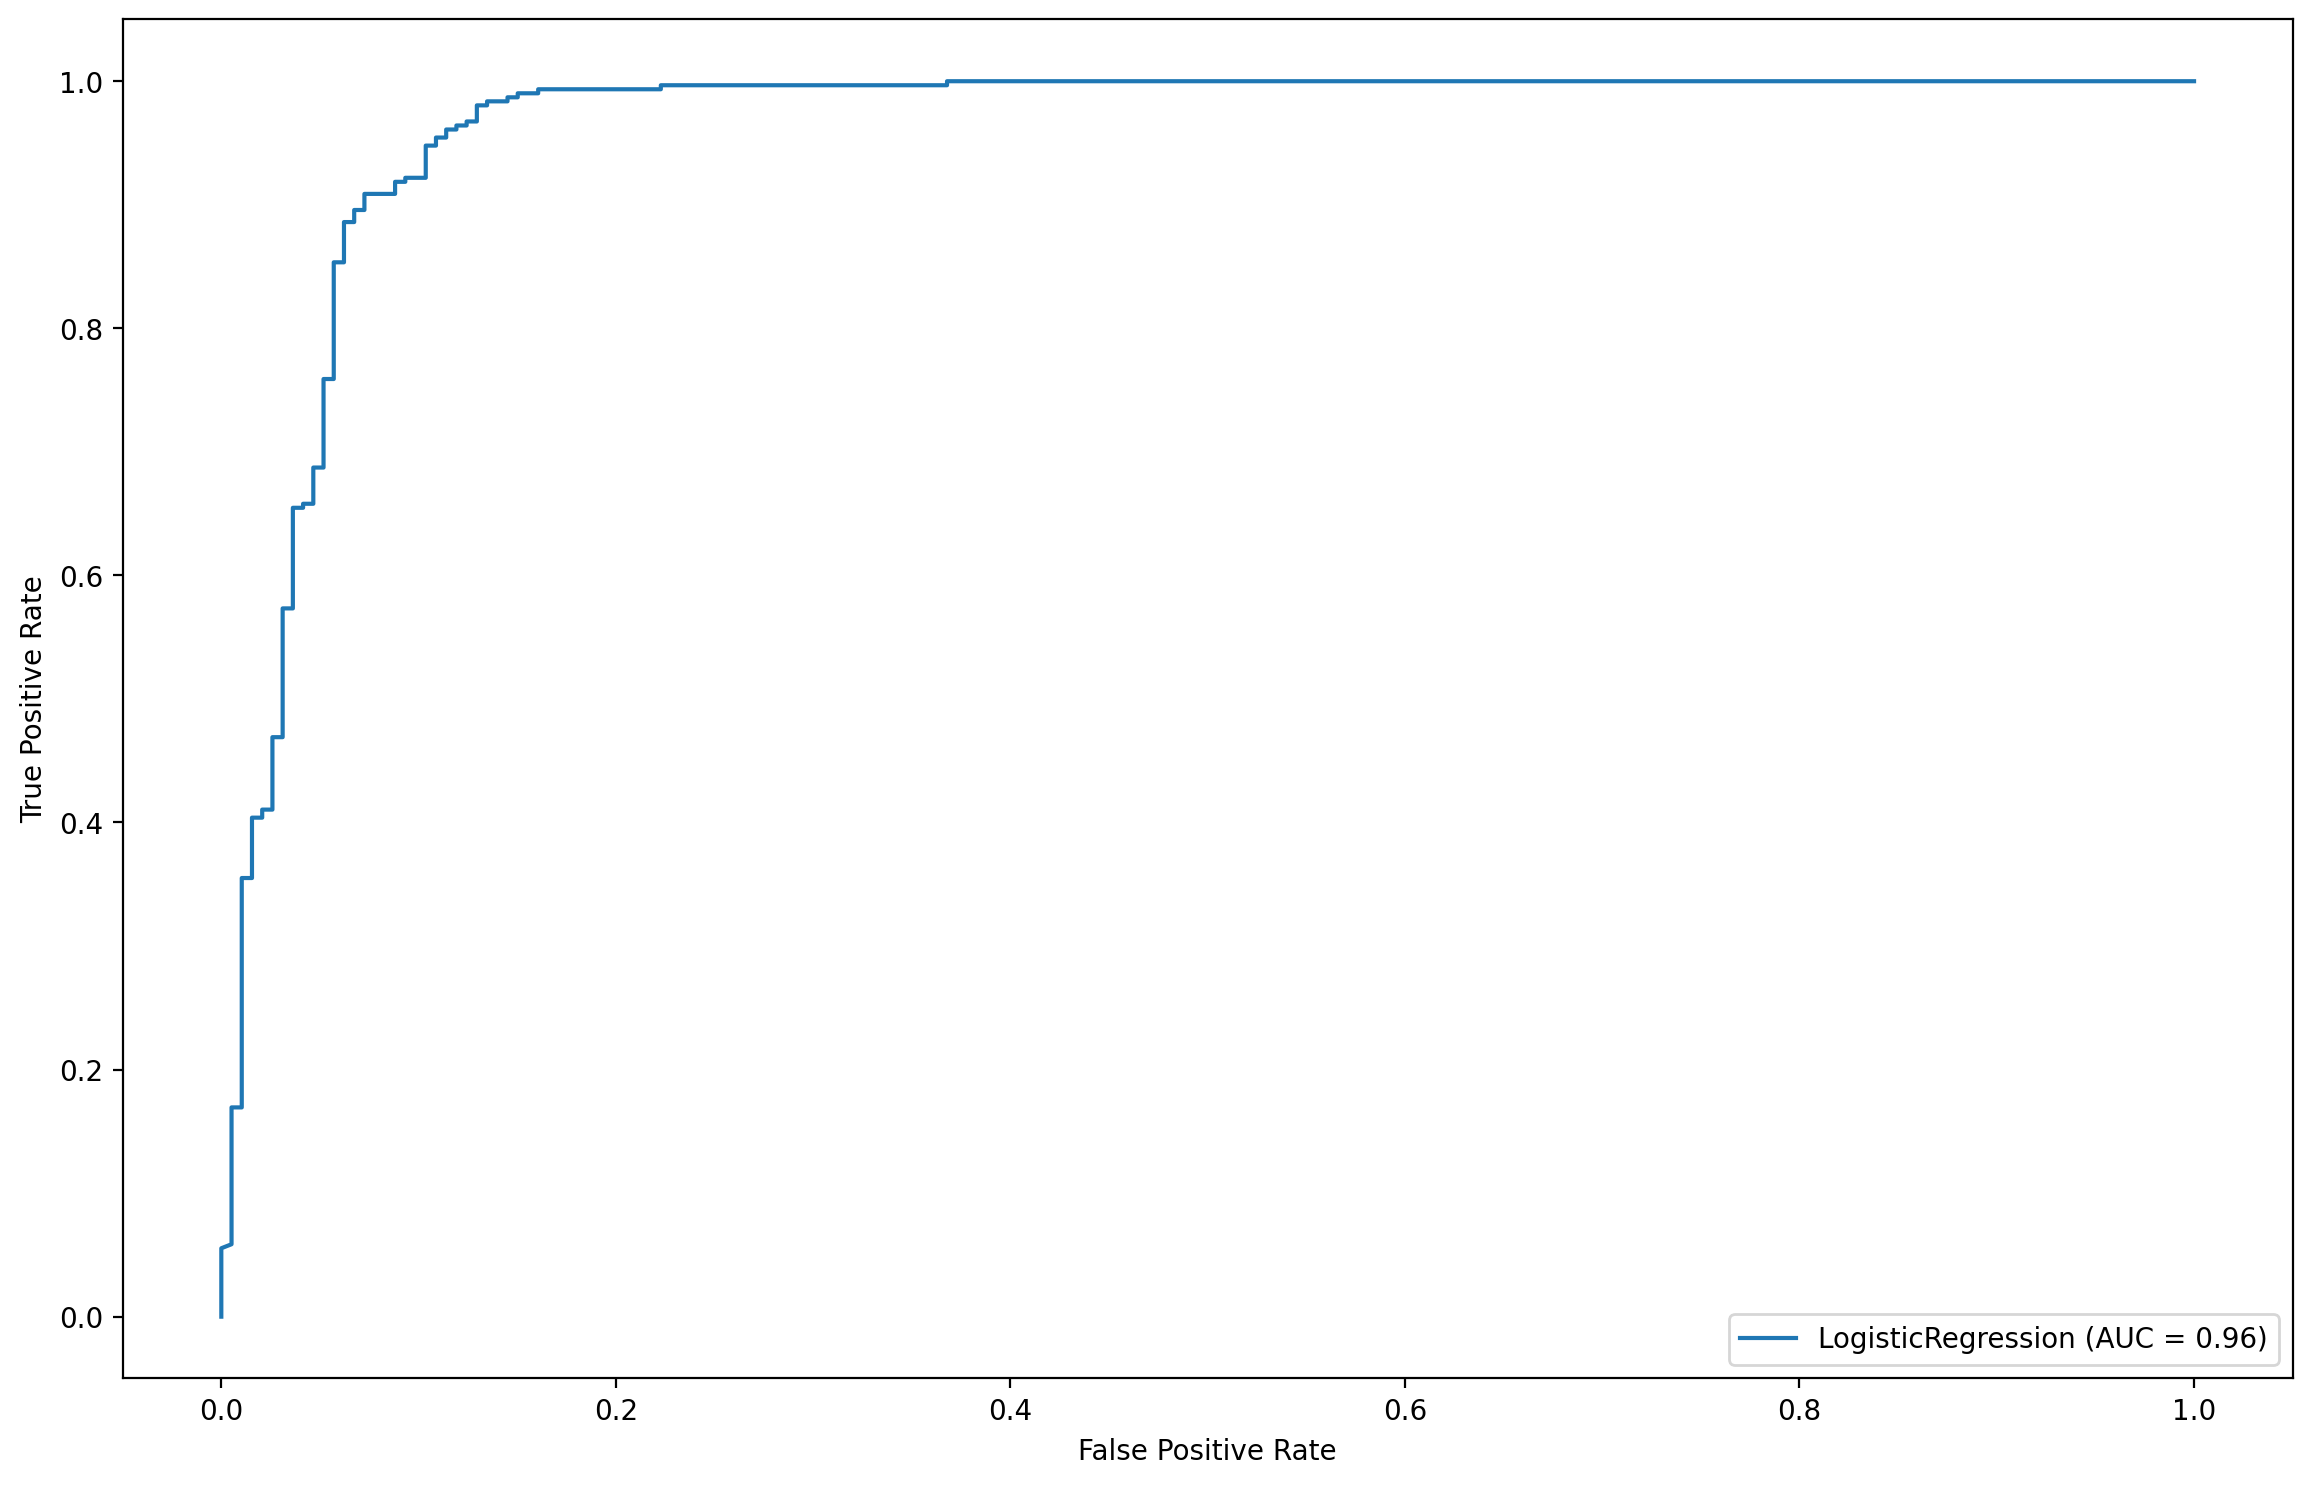

In [88]:
fig,ax = plt.subplots(figsize=(14,9),dpi=200)
plot_roc_curve(model_log,scaled_x_test,y_test,ax=ax)

In [89]:
df = pd.read_csv('../data/iris.csv')

In [90]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [91]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='species', ylabel='count'>

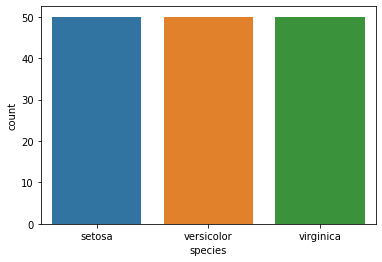

In [92]:
sns.countplot(data=df, x='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

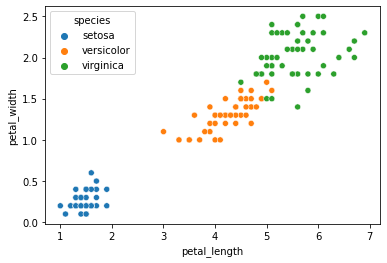

In [93]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

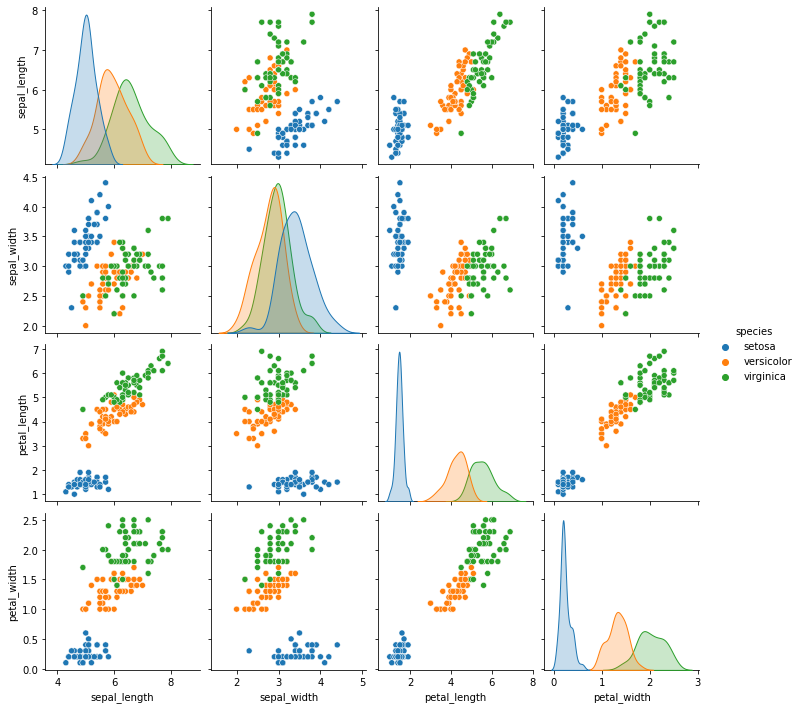

In [94]:
sns.pairplot(df, hue='species')

<AxesSubplot:>

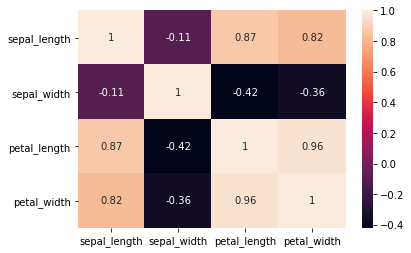

In [95]:
sns.heatmap(df.corr(), annot=True)

In [96]:
X = df.drop('species',axis=1)

In [97]:
y = df['species']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [99]:
scaler = StandardScaler()

In [100]:
scaled_x_train = scaler.fit_transform(X_train)

In [101]:
scaled_x_test = scaler.transform(X_test)

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
log_model = LogisticRegression(solver='saga', multi_class='ovr',max_iter=5000)

In [104]:
penalty = ['l1','l2']
l1_ratio = np.linspace(0,1,20)
C=np.logspace(0,10,20)

param = {'penalty':penalty,  'C':C}


In [105]:
grid_model = GridSearchCV(log_model, param_grid=param)

In [106]:
grid_model.fit(scaled_x_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2']})

In [107]:
y_pred = grid_model.predict(scaled_x_test)

In [108]:
accuracy_score(y_test,y_pred)

0.9736842105263158

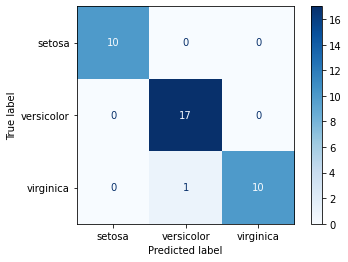

In [109]:
plot_confusion_matrix(grid_model,scaled_x_test,y_test,cmap='Blues')

In [110]:
###############################################################

In [111]:
df = pd.read_csv('../data/heart.csv')

In [112]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [114]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

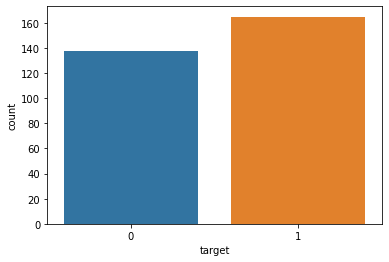

In [115]:
sns.countplot(data=df, x='target')

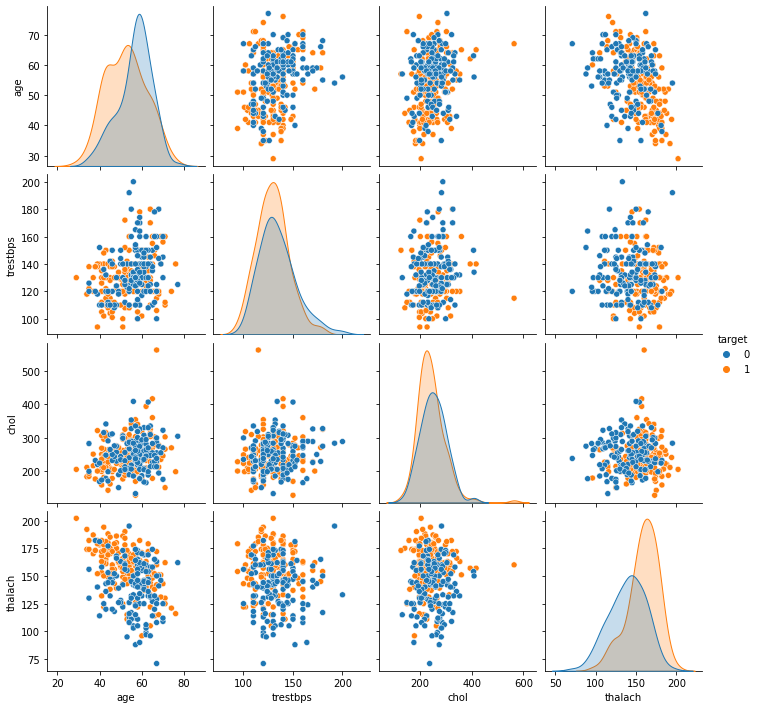

In [116]:
sns.pairplot(df[['age','trestbps','chol','thalach','target']], hue='target')

<AxesSubplot:>

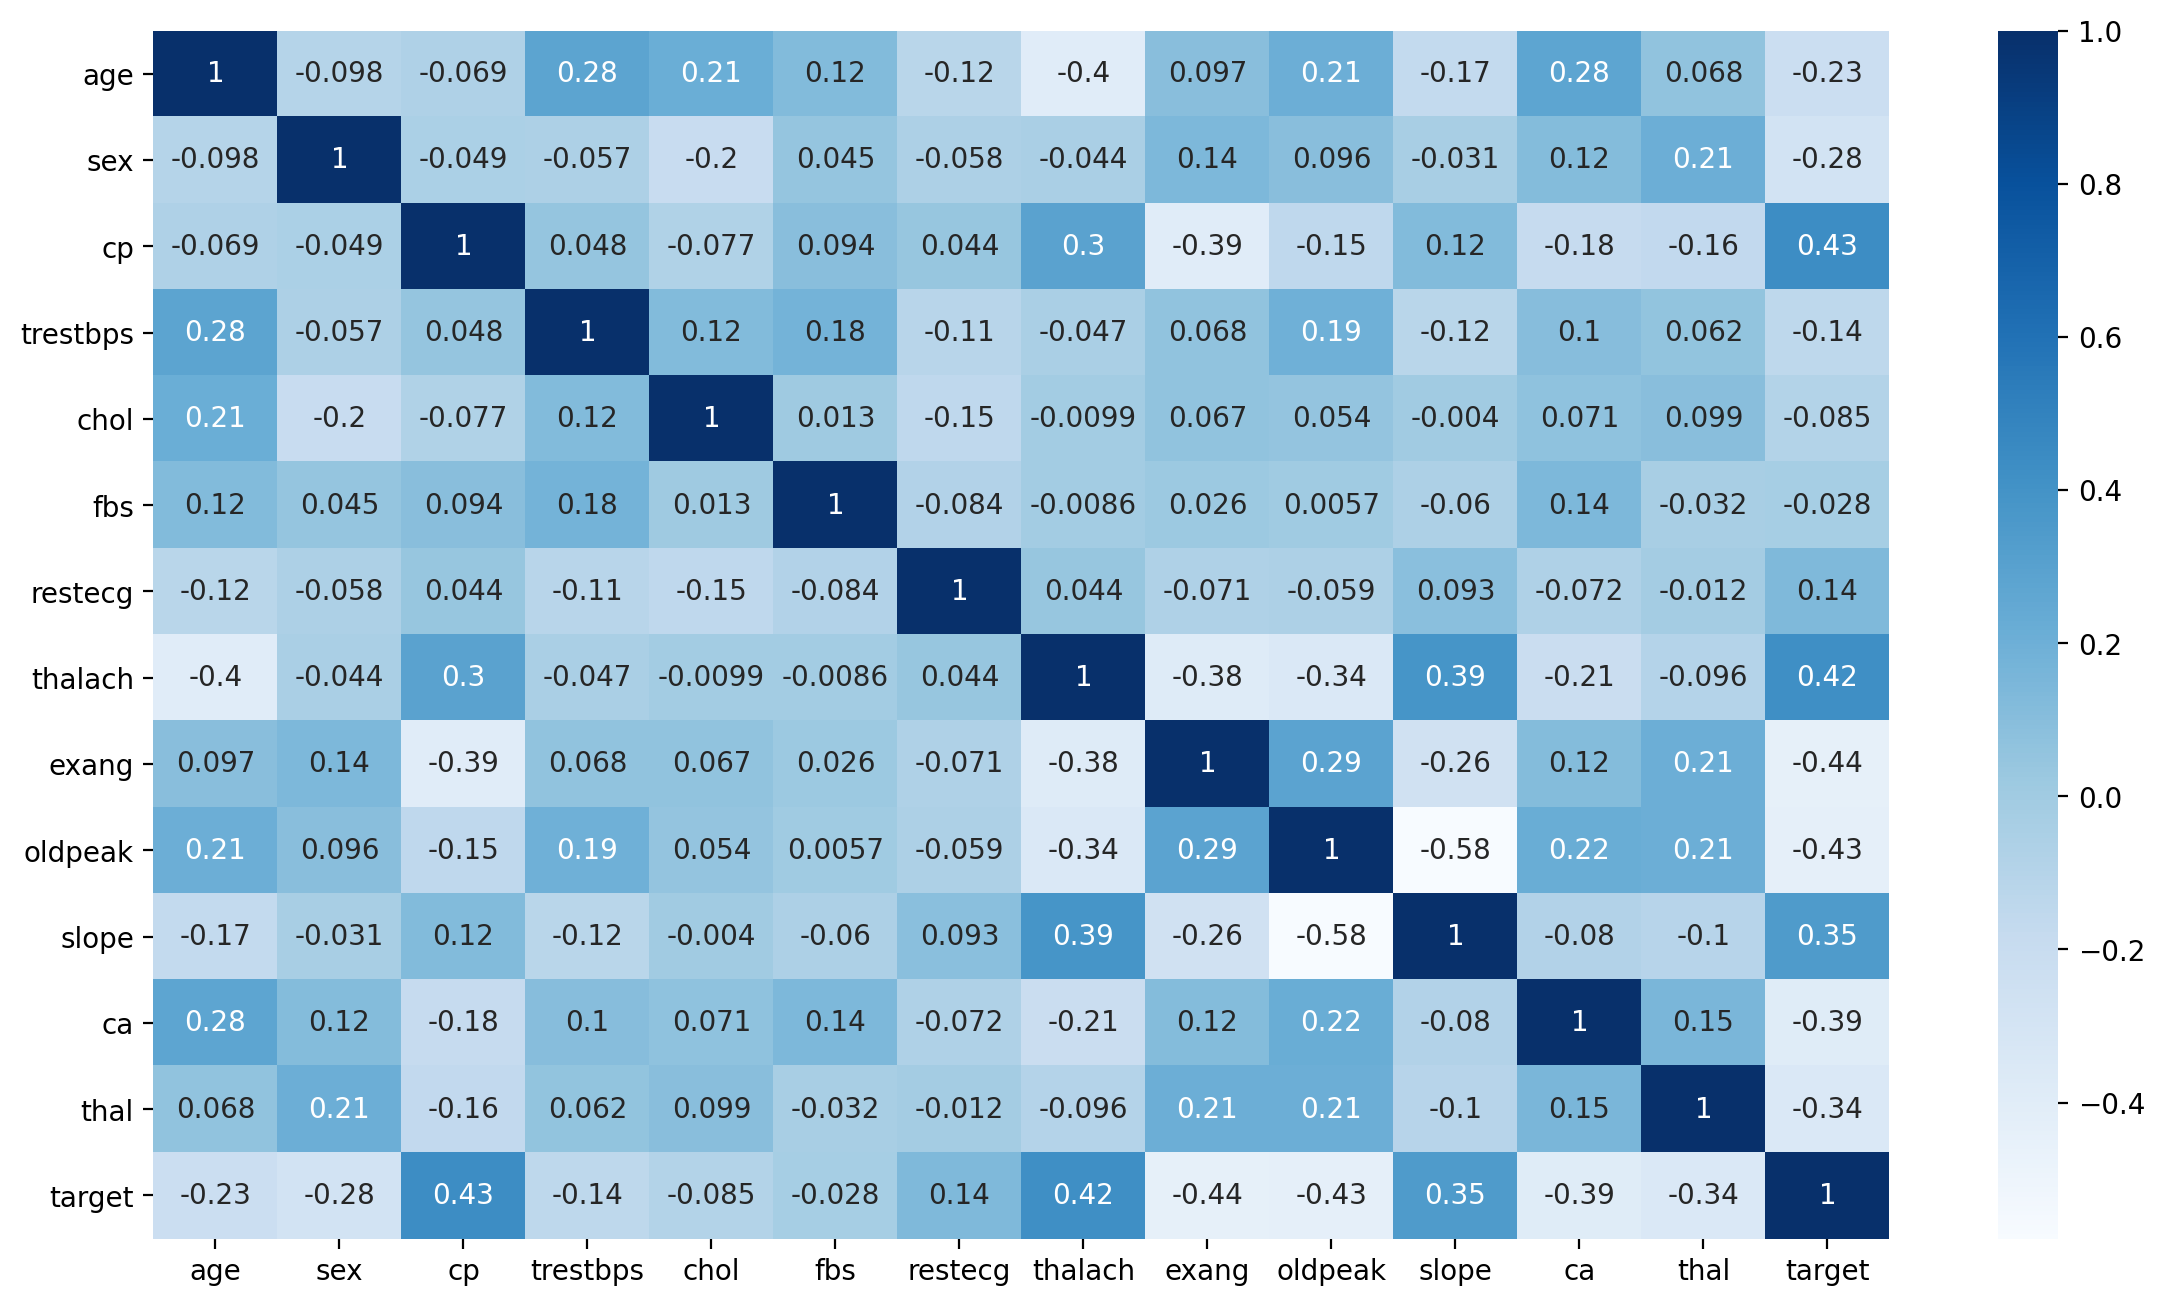

In [117]:
plt.figure(figsize=(14,8),dpi=200)
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [118]:
X = df.drop('target',axis=1)

In [119]:
y = df['target']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [121]:
scaler = StandardScaler()

In [122]:
sclaedx_train = scaler.fit_transform(X_train)

In [123]:
scaledx_test = scaler.transform(X_test)

In [124]:
from sklearn.linear_model import LogisticRegressionCV

In [125]:
model = LogisticRegressionCV()

In [126]:
model.fit(sclaedx_train,y_train)

LogisticRegressionCV()

In [127]:
model.C_

array([0.04641589])

In [128]:
model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [129]:
coef = pd.Series(index=X.columns, data=model.coef_[0])

In [130]:
coef

age        -0.096212
sex        -0.394602
cp          0.535347
trestbps   -0.138502
chol       -0.088305
fbs         0.024873
restecg     0.080838
thalach     0.299141
exang      -0.334382
oldpeak    -0.352386
slope       0.251010
ca         -0.497358
thal       -0.374486
dtype: float64

<AxesSubplot:>

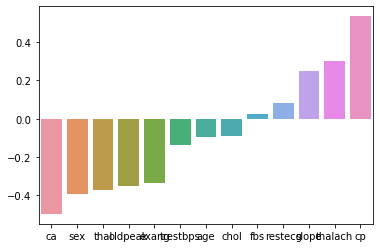

In [131]:
coef = coef.sort_values()
sns.barplot(x=coef.index, y=coef.values )

In [132]:
y_pred = model.predict(scaledx_test)

In [133]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

